In [ ]:
!git clone https://github.com/IDEACVR/DINO

Cloning into 'DINO'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 314 (delta 37), reused 28 (delta 28), pack-reused 255
Receiving objects: 100% (314/314), 13.41 MiB | 19.36 MiB/s, done.
Resolving deltas: 100% (105/105), done.


In [ ]:
%cd DINO/models/dino/ops

/content/DINO/models/dino/ops


In [ ]:
!python setup.py build install

x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/DINO/models/dino/ops/src -I/usr/local/lib/python3.7/dist-packages/torch/include -I/usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include -I/usr/local/lib/python3.7/dist-packages/torch/include/TH -I/usr/local/lib/python3.7/dist-packages/torch/include/THC -I/usr/local/cuda/include -I/usr/include/python3.7m -c /content/DINO/models/dino/ops/src/cpu/ms_deform_attn_cpu.cpp -o build/temp.linux-x86_64-3.7/content/DINO/models/dino/ops/src/cpu/ms_deform_attn_cpu.o -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE="_gcc" -DPYBIND11_STDLIB="_libstdcpp" -DPYBIND11_BUILD_ABI="_cxxabi1013" -DTORCH_EXTENSION_NAME=MultiScaleDeformableAttention -D_GLIBCXX_USE_CXX11_ABI=0 -std=c++14
/usr/lo

In [ ]:
%cd ../../..

/content/DINO


In [ ]:
import os
%mkdir checkpoint
os.chdir('/content/DINO/checkpoint')
#https://drive.google.com/file/d/1Slrekf60spGumTi2wh49Aww5iEmgXZEg/view?usp=sharing # 5scale-36
!gdown https://drive.google.com/uc?id=1Slrekf60spGumTi2wh49Aww5iEmgXZEg

Downloading...
From: https://drive.google.com/uc?id=1Slrekf60spGumTi2wh49Aww5iEmgXZEg
To: /content/DINO/checkpoint/checkpoint0031_5scale.pth
100% 566M/566M [00:04<00:00, 141MB/s]


In [ ]:
import os
os.chdir('/content/DINO')

In [ ]:
!pip install addict yapf timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 190 kB 5.2 MB/s 
     |████████████████████████████████| 509 kB 62.3 MB/s 


In [ ]:
!python main.py \
	--pretrain_model_path /content/DINO/checkpoint/checkpoint0031_5scale.pth --output_dir logs/DINO/original_5scale_1ep -c /content/DINO/config/DINO/DINO_5scale.py --coco_path /content/drive/MyDrive/colab/lg_com/DINO_COCO --save_results

Not using distributed mode
Loading config file from /content/DINO/config/DINO/DINO_5scale.py
[08/03 13:35:23.993]: git:
  sha: 24f3567e162c75f0323cf4a1ed2d5bf6e36bee52, status: has uncommited changes, branch: main

[08/03 13:35:23.993]: Command: main.py --pretrain_model_path /content/DINO/checkpoint/checkpoint0031_5scale.pth --output_dir logs/DINO/original_5scale_1ep -c /content/DINO/config/DINO/DINO_5scale.py --coco_path /content/drive/MyDrive/colab/lg_com/DINO_COCO --save_results
[08/03 13:35:23.994]: Full config saved to logs/DINO/original_5scale_1ep/config_args_all.json
[08/03 13:35:23.994]: world size: 1
[08/03 13:35:23.994]: rank: 0
[08/03 13:35:23.994]: local_rank: 0
[08/03 13:35:23.994]: args: Namespace(add_channel_attention=False, add_pos_value=False, amp=False, aux_loss=True, backbone='resnet50', backbone_freeze_keywords=None, batch_norm_type='FrozenBatchNorm2d', batch_size=1, bbox_loss_coef=5.0, box_attn_type='roi_align', clip_max_norm=0.1, cls_loss_coef=1.0, coco_panoptic_p

In [ ]:
## inference_and_visualization.ipynb

In [ ]:
%cd /content/DINO

/content/DINO


In [ ]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

In [ ]:
model_config_path = "config/DINO/DINO_5scale.py" # change the path of the model config file
model_checkpoint_path = "/content/DINO/checkpoint/checkpoint0031_5scale.pth" # change the path of the model checkpoint
# See our Model Zoo section in README.md for more details about our pretrained models.

In [ ]:
args = SLConfig.fromfile(model_config_path) 
args.device = 'cuda' 
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
args.dataset_file = 'coco'
args.coco_path = "/content/drive/MyDrive/colab/lg_com/DINO_COCO/" # the path of coco
args.fix_size = False

dataset_val = build_dataset(image_set='val', args=args)   

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [ ]:
# load coco names
with open('util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

In [ ]:
image, targets = dataset_val[0]

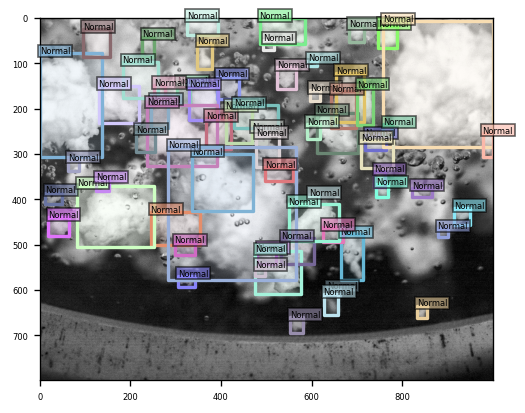

In [ ]:
# build gt_dict for vis
box_label = [id2name[int(item)] for item in targets['labels']]
gt_dict = {
    'area' : targets['area'],
    'boxes': targets['boxes'],
    'image_id': targets['image_id'],
    'size': targets['size'],
    'box_label': box_label,
}
vslzr = COCOVisualizer()
vslzr.visualize(image, gt_dict, savedir=None)

In [ ]:
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

/content/DINO/models/dino/position_encoding.py:95: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_tx = self.temperatureW ** (2 * (dim_tx // 2) / self.num_pos_feats)
/content/DINO/models/dino/position_encoding.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_ty = self.temperatureH ** (2 * (dim_ty // 2) / self.num_pos_feats)


In [ ]:
thershold = 0.3 # set a thershold

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

In [ ]:
box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': targets['size'],
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None)

In [ ]:
# https://github.com/IDEACVR/DINO/blob/main/inference_and_visualization.ipynb